In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('eda_outliers_dataset1.csv')
df.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


In [5]:
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

# Use the readable_numbers() function to create a new column
df['number_of_strikes_readable']=df['number_of_strikes'].apply(readable_numbers)


In [15]:
df

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M


In [7]:
print("Mean:" + readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df['number_of_strikes'])))

Mean:26.8M
Median:28.3M


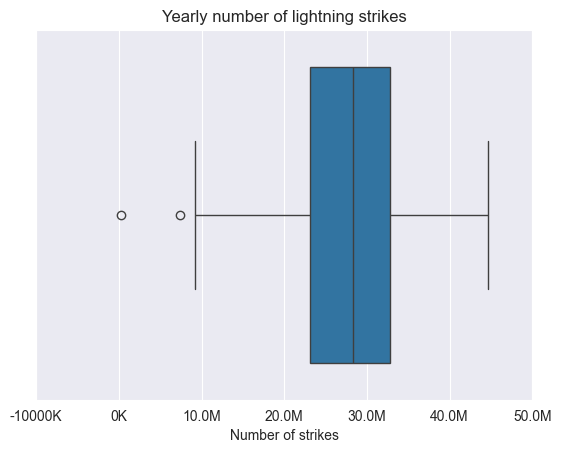

In [14]:
box = sns.boxplot(x=df['number_of_strikes'])
g = plt.gca()
xticks = g.get_xticks()
plt.xticks(xticks, labels=[readable_numbers(x) for x in xticks])
plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes');

In [18]:
percentile25 = df['number_of_strikes'].quantile(0.25)

percentile75 = df['number_of_strikes'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: '+ readable_numbers(lower_limit))

Lower limit is: 8.6M


In [19]:
df[df['number_of_strikes'] < lower_limit]

,year,number_of_strikes,number_of_strikes_readable
1,2019,209166,209K
33,1987,7378836,7.4M


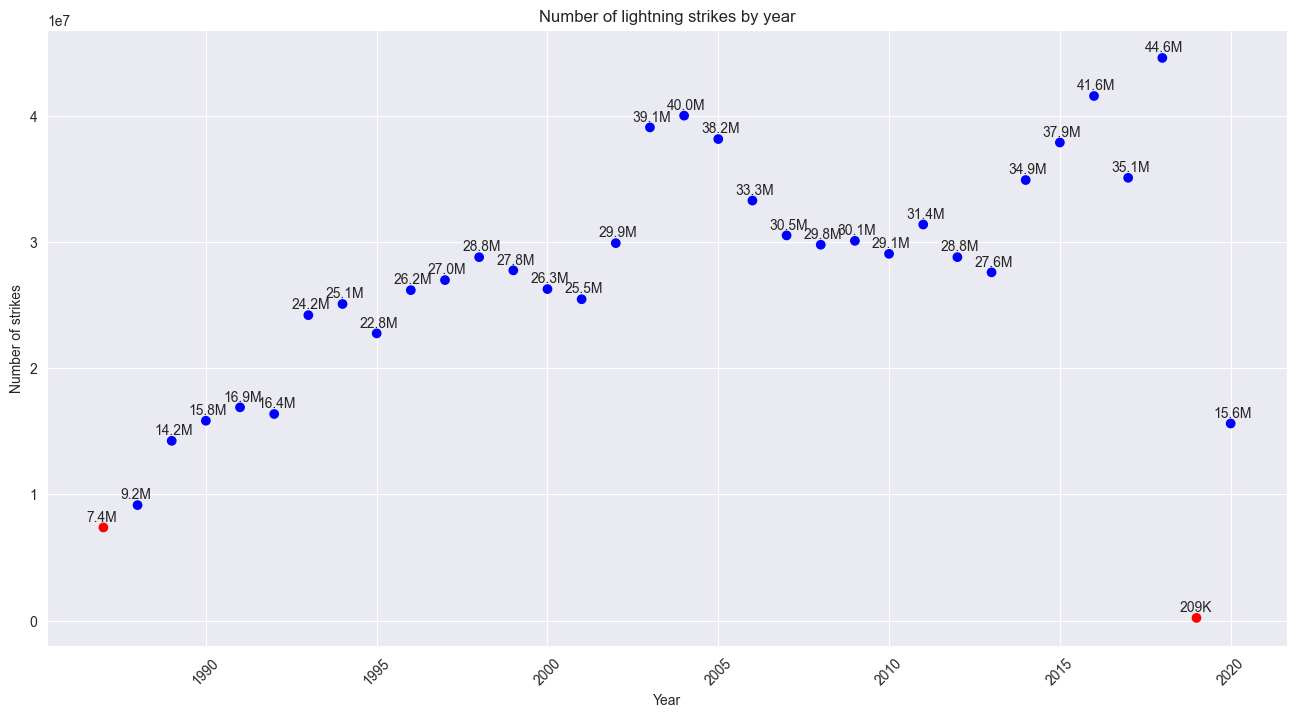

In [20]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))

colors = np.where(df['number_of_strikes'] < lower_limit, 'r', 'b')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['year'], df['number_of_strikes'],c=colors)
ax.set_xlabel('Year')
ax.set_ylabel('Number of strikes')
ax.set_title('Number of lightning strikes by year')
addlabels(df['year'], df['number_of_strikes'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

In [22]:
df_2019 = pd.read_csv('eda_outliers_dataset2.csv')
df_2019.head(10)

,date,number_of_strikes,center_point_geom
0,2019-12-01,1,POINT(-79.7 35.3)
1,2019-12-01,1,POINT(-84.7 39.3)
2,2019-12-01,1,POINT(-83.4 38.9)
3,2019-12-01,1,POINT(-71.5 35.2)
4,2019-12-01,1,POINT(-87.8 41.6)
5,2019-12-01,1,POINT(-85.4 36.8)
6,2019-12-01,1,POINT(-84 40.9)
7,2019-12-01,1,POINT(-54.7 40.9)
8,2019-12-01,1,POINT(-82.3 35.7)
9,2019-12-01,1,POINT(-55.7 40.7)


In [23]:
df_2019['date']= pd.to_datetime(df_2019['date'])

df_2019['month'] = df_2019['date'].dt.month
df_2019['month_txt'] = df_2019['date'].dt.month_name().str.slice(stop=3)


df_2019_by_month = df_2019.groupby(['month','month_txt']).sum(numeric_only=True).sort_values('month', ascending=True).head(12).reset_index()
df_2019_by_month

,month,month_txt,number_of_strikes
0,12,Dec,209166


2019 appears to have data only for the month of December. The likelihood of there not being any lightning from January to November 2019 is ~0. This appears to be a case of missing data. I should probably exclude 2019 from the analysis (for most use cases).

In [24]:
df_1987 = pd.read_csv('eda_outliers_dataset3.csv')
df_1987['date']= pd.to_datetime(df_1987['date'])
df_1987['month'] = df_1987['date'].dt.month
df_1987['month_txt'] = df_1987['date'].dt.month_name().str.slice(stop=3)


df_1987_by_month = df_1987.groupby(['month','month_txt']).sum(numeric_only=True).sort_values('month', ascending=True).head(12).reset_index()
df_1987_by_month

,month,month_txt,number_of_strikes
0,1,Jan,23044
1,2,Feb,61020
2,3,Mar,117877
3,4,Apr,157890
4,5,May,700910
5,6,Jun,1064166
6,7,Jul,2077619
7,8,Aug,2001899
8,9,Sep,869833
9,10,Oct,105627


In [25]:
df_without_outliers = df[df['number_of_strikes'] >= lower_limit]

print("Mean:" + readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df_without_outliers['number_of_strikes'])))

Mean:28.2M
Median:28.8M
